In [12]:
# can be removed if LinOT package is installed via pip
import sys
sys.path.append("../../lib")

import numpy as np

import LinOT
import LinOT.Visualization as Vis

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

matplotlib.rc('image', interpolation='nearest')
matplotlib.rc('figure',facecolor='white')
matplotlib.rc('image',cmap='viridis')

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

In [13]:
def getR(phi):
    return np.array([[np.cos(phi),-np.sin(phi)],[np.sin(phi),np.cos(phi)]])
def getCov(phi,s0,s1):
    R=getR(phi)
    return R@np.diag([s0,s1])@R.T

In [14]:
nSamples=50
# variance along axis 0
aList=0.8+0.8*np.random.random(size=nSamples)
# variance along axis 1
bList=0.9+0.1*np.random.random(size=nSamples)
# correlation
rhoList=-0.5+1*np.random.random(size=nSamples)
covList=np.zeros((nSamples,2,2),dtype=np.double)
covList[:,0,0]=aList
covList[:,1,1]=bList
covList[:,0,1]=np.sqrt(aList*bList)*rhoList
covList[:,1,0]=covList[:,0,1]
meanList=np.zeros((nSamples,2),dtype=np.double)

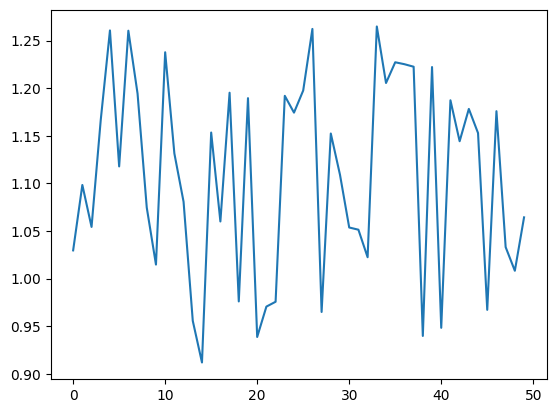

In [15]:
plt.plot(covList[:,0,0]**0.5)

In [16]:
covRef=np.identity(2)
meanRef=np.zeros(2)

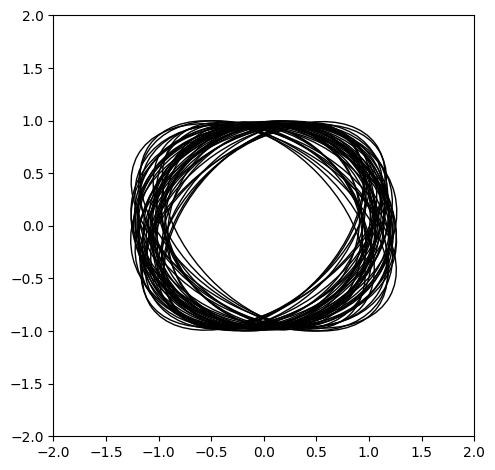

In [17]:
fig=plt.figure()
ax=fig.add_subplot(aspect=1.)
for cov in covList:
    Vis.addEllipseMat(ax,[0,0],cov,fill=False)
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
plt.tight_layout()
plt.show()

In [18]:
# create embedding object, add samples, center samples, perform pca
Embedding=LinOT.LinW2GaussEmbedding(covRef,meanRef)
Embedding.addSamples((covList,meanList))
Embedding.centerSamples()
Embedding.performPCA()

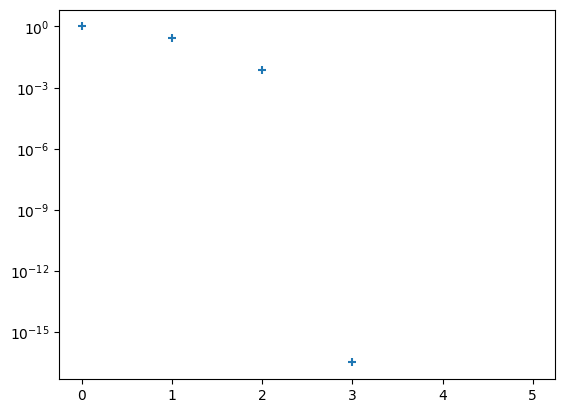

In [19]:
Vis.PCASpectrum(Embedding,normalize=True)

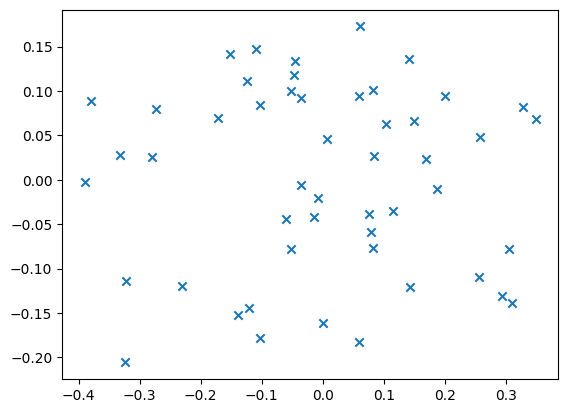

In [20]:
Vis.PCAPlot(Embedding,[0,1])

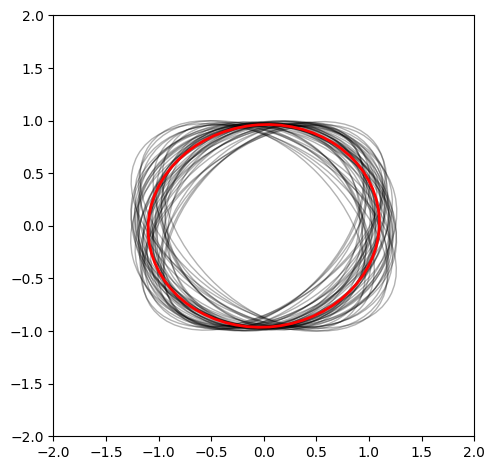

In [21]:
res=Embedding.getMeanExp()

fig=plt.figure()
ax=fig.add_subplot(aspect=1.)
for cov in covList:
    Vis.addEllipseMat(ax,[0,0],cov,fill=False,alpha=0.3)
Vis.addEllipseMat(ax,res[1],res[0],fill=False,ec="r",lw=2.)
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
plt.tight_layout()
plt.show()

0


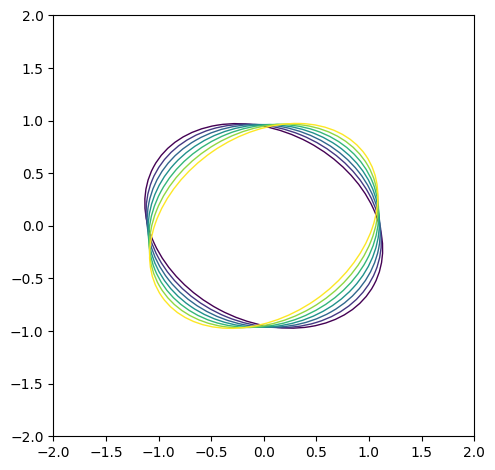

1


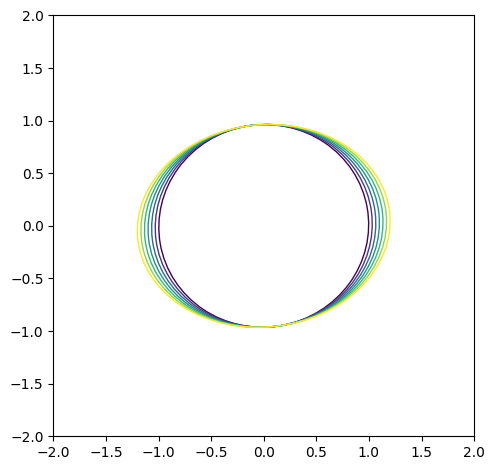

2


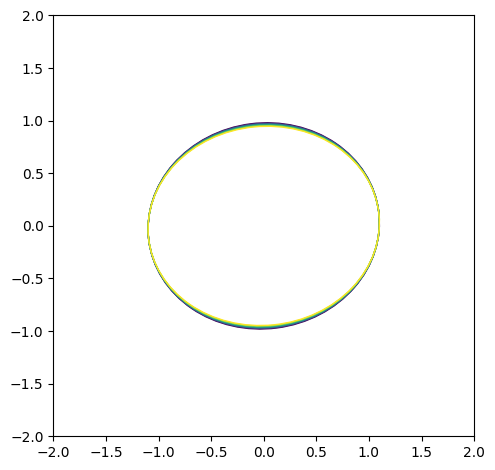

In [22]:
for i in [0,1,2]:
    print(i)
    vec=np.zeros(i+1)
    vec[i]=1.
    res=Embedding.expPCA(vec,tSeq=Embedding.pca_std[i]*np.linspace(-1,1,num=7))

    fig=plt.figure()
    ax=fig.add_subplot(aspect=1.)
    for j,(cov,mean) in enumerate(res):
        Vis.addEllipseMat(ax,mean,cov,fill=False,ec=cm.viridis(j/6))
    ax.set_xlim([-2,2])
    ax.set_ylim([-2,2])
    plt.tight_layout()
    plt.show()